# Import the Necessary Libraries
#You can combine multiple CSV files into one file for import into Jupyter Notebooks using Python's Pandas library. Here's a step-by-step guide on how to do this:


In [25]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Specify the path to your CSV file
file_path = file_path = "C:\\Users\\eliud\\OneDrive\\Desktop\\pythonProject\\SEN_2018_EHCVM_v02_M_CSV\\ehcvm_individu_sen2018.csv"



In [7]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Exploratory Data Analysis

In [8]:
# Display the first few rows of the dataset
print(df.head())

  country  year  vague  hhid  grappe  menage  numind  zae  domaine  region  \
0     SEN  2018      1  1001       1       1       1    1        1       1   
1     SEN  2018      1  1001       1       1       2    1        1       1   
2     SEN  2018      1  1002       1       2       1    1        1       1   
3     SEN  2018      1  1002       1       2       2    1        1       1   
4     SEN  2018      1  1003       1       3       1    1        1       1   

   ...  sectins  csp  volhor    salaire  emploi_sec  sectins_sec  csp_sec  \
0  ...      3.0  4.0     NaN        0.0           0          NaN      NaN   
1  ...      NaN  NaN     NaN        NaN           0          NaN      NaN   
2  ...      3.0  1.0   600.0  9600000.0           0          NaN      NaN   
3  ...      NaN  NaN     NaN        NaN           0          NaN      NaN   
4  ...      1.0  7.0  2288.0        NaN           0          NaN      NaN   

   volhor_sec  salaire_sec  bank  
0         NaN          NaN     0 

In [9]:
# Get a summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66120 entries, 0 to 66119
Data columns (total 51 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      66120 non-null  object 
 1   year         66120 non-null  int64  
 2   vague        66120 non-null  int64  
 3   hhid         66120 non-null  int64  
 4   grappe       66120 non-null  int64  
 5   menage       66120 non-null  int64  
 6   numind       66120 non-null  int64  
 7   zae          66120 non-null  int64  
 8   domaine      66120 non-null  int64  
 9   region       66120 non-null  int64  
 10  departement  66120 non-null  int64  
 11  milieu       66120 non-null  int64  
 12  hhweight     66120 non-null  float64
 13  resid        66120 non-null  int64  
 14  sexe         66118 non-null  float64
 15  age          66113 non-null  float64
 16  lien         66116 non-null  float64
 17  mstat        66115 non-null  float64
 18  religion     66120 non-null  int64  
 19  nati

In [10]:
# Descriptive statistics
print(df.describe())

          year         vague           hhid        grappe        menage  \
count  66120.0  66120.000000   66120.000000  66120.000000  66120.000000   
mean    2018.0      1.497701  313875.596189    313.869132      6.464307   
std        0.0      0.499998  166875.698455    166.875672      3.438522   
min     2018.0      1.000000    1001.000000      1.000000      1.000000   
25%     2018.0      1.000000  175008.000000    175.000000      3.000000   
50%     2018.0      1.000000  314012.000000    314.000000      6.000000   
75%     2018.0      2.000000  460006.250000    460.000000      9.000000   
max     2018.0      2.000000  598012.000000    598.000000     12.000000   

             numind           zae       domaine        region   departement  \
count  66120.000000  66120.000000  66120.000000  66120.000000  66120.000000   
mean       7.564534      3.529356      6.515563      7.094389     72.863733   
std        6.402118      1.423716      3.330475      4.057822     40.449394   
min     

### Handle missing data:

In [11]:
# Check for missing values
print(df.isnull().sum())



country            0
year               0
vague              0
hhid               0
grappe             0
menage             0
numind             0
zae                0
domaine            0
region             0
departement        0
milieu             0
hhweight           0
resid              0
sexe               2
age                7
lien               4
mstat              5
religion           0
nation             9
agemar         42322
mal30j             0
aff30j         50749
arrmal             0
durarr         56893
con30j         50749
hos12m             0
couvmal            0
moustiq            0
handit         10160
handig         10160
alfab              0
scol               0
educ_scol      49655
educ_hi            4
diplome            0
telpor             0
internet           0
activ7j            0
activ12m           0
branch         45549
sectins        45551
csp            45549
volhor         49069
salaire        60535
emploi_sec         0
sectins_sec    63115
csp_sec      

### impute missing values for all the columns using the KNNImputer

In [16]:
# Separate the numeric and categorical columns in your dataset

numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns



In [18]:
#Create a DataFrame containing only numeric columns. This will be used for imputation.
numeric_df = df[numeric_columns]


In [19]:
#Impute the missing values using KNNImputer for the numeric_df
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
numeric_df_imputed = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_columns)


In [20]:
#imputation for categorical columns
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


In [21]:
#After imputing both numeric and categorical columns, you can combine them back into a single DataFrame
df_imputed = pd.concat([numeric_df_imputed, df[categorical_columns]], axis=1)


In [22]:
# Check for missing values
print(df_imputed.isnull().sum())


year           0
vague          0
hhid           0
grappe         0
menage         0
numind         0
zae            0
domaine        0
region         0
departement    0
milieu         0
hhweight       0
resid          0
sexe           0
age            0
lien           0
mstat          0
religion       0
nation         0
agemar         0
mal30j         0
aff30j         0
arrmal         0
durarr         0
con30j         0
hos12m         0
couvmal        0
moustiq        0
handit         0
handig         0
alfab          0
scol           0
educ_scol      0
educ_hi        0
diplome        0
telpor         0
internet       0
activ7j        0
activ12m       0
branch         0
sectins        0
csp            0
volhor         0
salaire        0
emploi_sec     0
sectins_sec    0
csp_sec        0
volhor_sec     0
salaire_sec    0
bank           0
country        0
dtype: int64


In [23]:
# Descriptive statistics
print(df_imputed.describe())

          year         vague           hhid        grappe        menage  \
count  66120.0  66120.000000   66120.000000  66120.000000  66120.000000   
mean    2018.0      1.497701  313875.596189    313.869132      6.464307   
std        0.0      0.499998  166875.698455    166.875672      3.438522   
min     2018.0      1.000000    1001.000000      1.000000      1.000000   
25%     2018.0      1.000000  175008.000000    175.000000      3.000000   
50%     2018.0      1.000000  314012.000000    314.000000      6.000000   
75%     2018.0      2.000000  460006.250000    460.000000      9.000000   
max     2018.0      2.000000  598012.000000    598.000000     12.000000   

             numind           zae       domaine        region   departement  \
count  66120.000000  66120.000000  66120.000000  66120.000000  66120.000000   
mean       7.564534      3.529356      6.515563      7.094389     72.863733   
std        6.402118      1.423716      3.330475      4.057822     40.449394   
min     

In [27]:
# Get a summary of the dataset
print(df_imputed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66120 entries, 0 to 66119
Data columns (total 51 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         66120 non-null  float64
 1   vague        66120 non-null  float64
 2   hhid         66120 non-null  float64
 3   grappe       66120 non-null  float64
 4   menage       66120 non-null  float64
 5   numind       66120 non-null  float64
 6   zae          66120 non-null  float64
 7   domaine      66120 non-null  float64
 8   region       66120 non-null  float64
 9   departement  66120 non-null  float64
 10  milieu       66120 non-null  float64
 11  hhweight     66120 non-null  float64
 12  resid        66120 non-null  float64
 13  sexe         66120 non-null  float64
 14  age          66120 non-null  float64
 15  lien         66120 non-null  float64
 16  mstat        66120 non-null  float64
 17  religion     66120 non-null  float64
 18  nation       66120 non-null  float64
 19  agem

In [ ]:
column_data_types = df_imputed.dtypes
print("Data types of all columns:")
print(column_data_types)


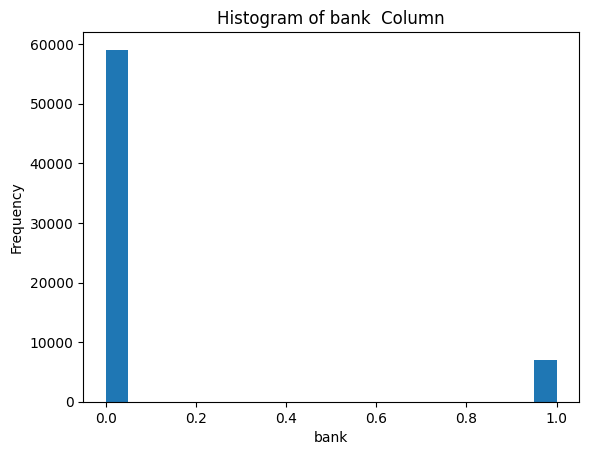

In [31]:
# Histogram of a numeric column
plt.hist(df_imputed['bank'], bins=20)
plt.xlabel('bank')
plt.ylabel('Frequency')
plt.title('Histogram of bank  Column')
plt.show()




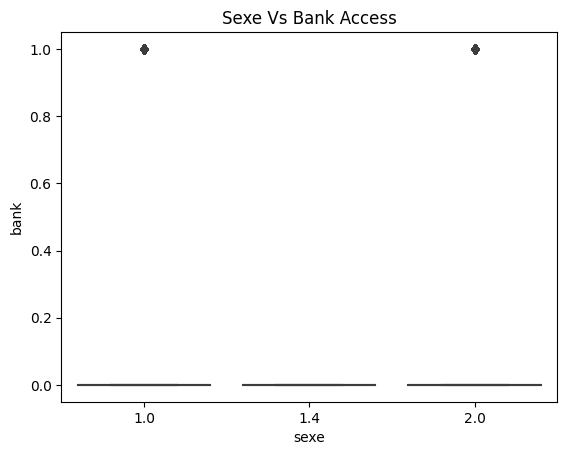

In [32]:
# Box plot for outliers
sns.boxplot(x='sexe', y='bank', data=df_imputed) #where x is the categorical column and y is the numerical column
plt.xlabel('sexe')
plt.ylabel('bank')
plt.title('Sexe Vs Bank Access')
plt.show()


In [ ]:
# Pairplot for visualizing relationships (for smaller datasets)
sns.pairplot(df_imputed)
plt.show()


In [ ]:
# Correlation matrix
correlation_matrix = df_imputed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




In [ ]:
# Scatter plot for two variables
sns.scatterplot(x='age', y='salaire_sec', data=df_imputed)
plt.xlabel('Age')
plt.ylabel('Salary_Sec')
plt.title('Age Vs Income')
plt.show()

In [ ]:
# Count plot for a categorical variable
sns.countplot(x='sexe', data=df)
plt.xlabel('sexe')
plt.ylabel('Count')
plt.title('Count Plot')
plt.show()

# Cross-tabulation between two categorical variables
cross_tab = pd.crosstab(df['sexe'], df['age'])
print(cross_tab)
